<a href="https://colab.research.google.com/github/Jisan10667/SWE-3-2-Mechine-Learning-Assignment/blob/main/Final%20Assignments/pneumoniaCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import tensorflow as tf
import os
import numpy as np
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/PatientJPG/train'
val_dir = '/content/drive/MyDrive/PatientJPG/val'
os.listdir(train_dir)

['PNEUMONIA', 'NORMAL']

In [4]:
val_data = tf.keras.utils.image_dataset_from_directory(val_dir)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

Found 16 files belonging to 2 classes.
Found 5216 files belonging to 2 classes.


In [5]:
train_data_iterator = train_data.as_numpy_iterator()

In [6]:
train_batch = train_data_iterator.next()
train_batch[0].shape


(32, 256, 256, 3)

In [7]:
train_batch[1]

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

#Visualize training data

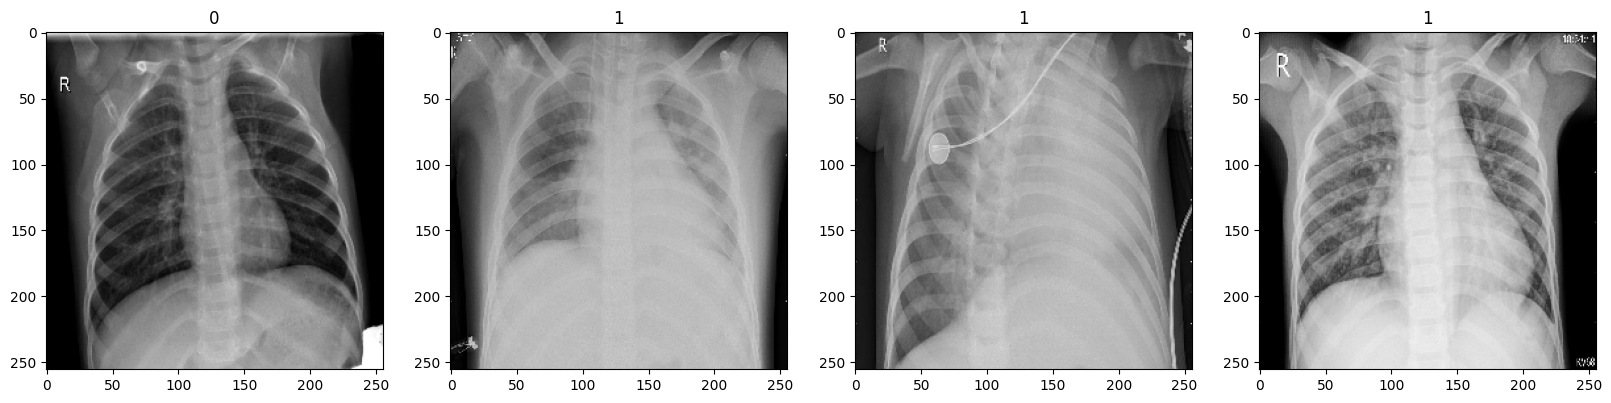

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [9]:
train_data = train_data.map(lambda x,y: (x/255, y))
val_data = val_data.map(lambda x,y: (x/255, y))

In [10]:
val_data.as_numpy_iterator().next()[0].max()


1.0

In [11]:
train = train_data.take(int(len(train_data)))
val= val_data.take(int(len(val_data)))

CNN Architecture

In [25]:

model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 16)       

#Model Training

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
163/163 [==============================] - 625s 4s/step - loss: 0.2474 - accuracy: 0.8969 - val_loss: 0.9754 - val_accuracy: 0.6875
Epoch 2/25
163/163 [==============================] - 53s 301ms/step - loss: 0.1072 - accuracy: 0.9624 - val_loss: 0.1775 - val_accuracy: 0.9375
Epoch 3/25
163/163 [==============================] - 54s 321ms/step - loss: 0.0797 - accuracy: 0.9722 - val_loss: 0.2670 - val_accuracy: 0.8750
Epoch 4/25
163/163 [==============================] - 55s 317ms/step - loss: 0.0652 - accuracy: 0.9787 - val_loss: 0.0707 - val_accuracy: 1.0000
Epoch 5/25
163/163 [==============================] - 53s 314ms/step - loss: 0.0509 - accuracy: 0.9837 - val_loss: 0.3801 - val_accuracy: 0.7500
Epoch 6/25
163/163 [==============================] - 55s 317ms/step - loss: 0.0411 - accuracy: 0.9854 - val_loss: 0.2224 - val_accuracy: 0.8750
Epoch 7/25
163/163 [==============================] - 51s 303ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0559 - val_accu

#Loss Graph

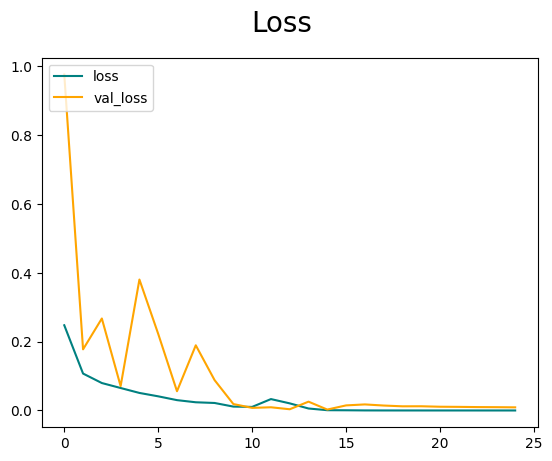

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Accuracy Graph

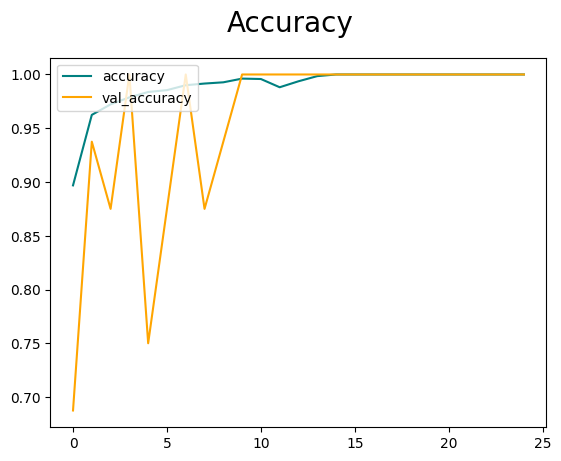

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

#Load Test Data

In [35]:
test_data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/PatientJPG/test')

Found 624 files belonging to 2 classes.


In [37]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()
test = test_data.take(int(len(test_data)))

##Testing our model against Test Data

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 84ms/step


##F1 score,precision,recall, accuraacy

In [39]:
f1_score = (2 * (pre.result().numpy() * re.result().numpy())) / (pre.result().numpy() + re.result().numpy())
f1_score
print(f'Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()},Precision: {pre.result().numpy()}')

Recall: 0.9948717951774597,Accuracy: 0.7307692170143127,Precision: 0.7003610134124756


#Manually testing a normal image

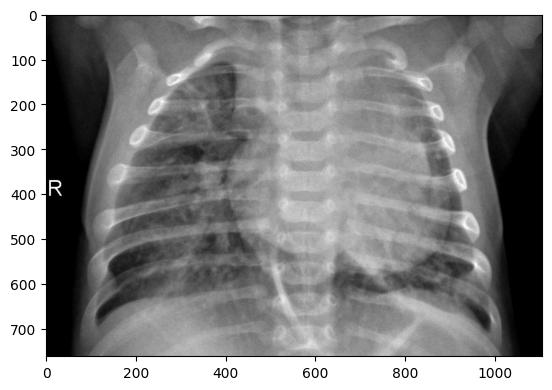

In [40]:
image = cv2.imread('/content/drive/MyDrive/PatientJPG/test/PNEUMONIA/person100_bacteria_475.jpeg')
plt.imshow(image)
plt.show()


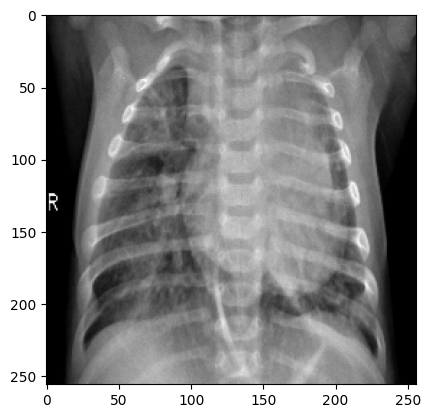

In [41]:
resize = tf.image.resize(image, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 230ms/step


In [43]:
yhat

array([[1.]], dtype=float32)

In [44]:
if yhat > 0.5:
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class Has Pneumonia


#Again Manual Testing

In [45]:
img = cv2.imread('/content/drive/MyDrive/PatientJPG/test/PNEUMONIA/person108_bacteria_506.jpeg')
plt.show()

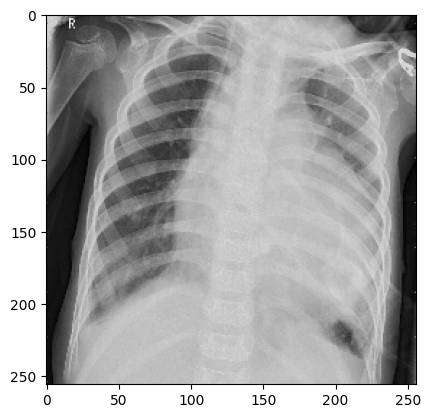

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [48]:
if yhat > 0.5:
    print(f'Predicted class Has Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class Has Pneumonia
